# Image Retrieval

In [1]:
# Moduli keras
import keras
from keras.preprocessing import image as kimage
from keras.applications import mobilenet_v2, densenet, vgg16
from keras.applications import resnet50
keras.__version__
# Gestione e salvataggio albero di ricerca
from sklearn.neighbors import KDTree
import joblib
from numpy import asarray
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import time
import os
import cv2 as cv
detector = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

Using TensorFlow backend.


## Image Loader and Feature extraction

In [178]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    image = kimage.load_img(filename, target_size = required_size)
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    # detect faces in the image
    results = detector.detectMultiScale(pixels)
    # extract the bounding box from the first face
    face = list()
    for (x,y,w,h) in results:
        face.append(pixels[y:y+h,x:x+h,:])
    # resize pixels to the model size
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

#load faces
def load_faces(directory, param, feature_extractor):
    faces = list()
    paths = list()
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') and count < param:
            path = directory + "/" + filename
            paths.append(path)
            path = extract_face(path)
            faces.append(feature_extractor(path))
        else:
            break
        count = count +1
    return faces, paths

# Feature dummy
def identity(image):
    return image

# Data loader
def load_dataset(x,feature_extractor=identity):
    directory = '/Users/Unibo/Desktop/Dsim_Github/DSIM-master/thumbnails_features_deduped_publish/thumbnails_features_deduped_publish/'
    X, y = list(),list()
    
    for subdir in os.listdir(directory):
                # Memorizza percorso file
                cur_path = directory + subdir 
                faces, paths = load_faces(cur_path,x,feature_extractor)
                #labels
                labels = [subdir for _ in range(len(faces))]
               # summarize progress
                print('>loaded %d examples for class: %s' % (len(faces), subdir))
                # store
                X.extend(faces)
                y.extend(paths)
    return asarray(X), asarray(y)

### Acquisizione immagine

In [345]:
cap = cv.VideoCapture(0)
time.sleep(3)
result, img = cap.read()
cap.release()

faces = detector.detectMultiScale(img)
for (x,y,w,h) in faces:
    face = img[y:y+h,x:x+h,:]
#reshape dell'immagine
face=cv.resize(face, (224,224))

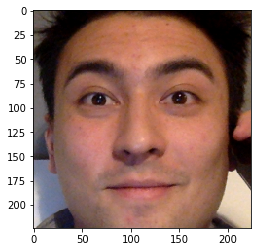

(<matplotlib.image.AxesImage at 0x1c83cd5710>, None)

In [346]:
plt.imshow(face[:,:,-1::-1]), plt.show()

## Image Retrieval using MobileNet V2

In [188]:
# Caricamento modello MobileNetV2
net = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', pooling='avg', input_shape=(224, 224, 3))

In [189]:
#features extraction
def neural_features(img):
    x = kimage.img_to_array(img)
    x = mobilenet_v2.preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    f = net.predict(x)
    return f.flatten()

In [283]:
#estrazione delle features dalla query
features = neural_features(face)
print(features.shape)
# Aggiunta dimensione per l'uso del KDTree
query_features = np.expand_dims(features, axis=0)
print(query_features.shape)

(1280,)
(1, 1280)


In [191]:
t0 = time.time()
X_train, paths = load_dataset(1,feature_extractor=neural_features)
print("Caricamento e feature extraction in %0.3f secondi" % (time.time() - t0))

>loaded 1 examples for class: jessica biel
>loaded 1 examples for class: robert gates
>loaded 1 examples for class: justin timberlake
>loaded 1 examples for class: tim gunn
>loaded 1 examples for class: madhuri dixit
>loaded 1 examples for class: lara dutta
>loaded 1 examples for class: triple h
>loaded 1 examples for class: rodrigo santoro
>loaded 1 examples for class: dennis hopper
>loaded 1 examples for class: anna semenovich
>loaded 1 examples for class: freddie prinze
>loaded 1 examples for class: candice swanepoel
>loaded 1 examples for class: emily procter
>loaded 1 examples for class: prince william
>loaded 1 examples for class: julian mcmahon
>loaded 1 examples for class: demi moore
>loaded 1 examples for class: ringo starr
>loaded 1 examples for class: sharon stone
>loaded 1 examples for class: annalynne mccord
>loaded 1 examples for class: travis barker
>loaded 1 examples for class: thomas jane
>loaded 1 examples for class: michelle hunziker
>loaded 1 examples for class: dar

>loaded 1 examples for class: mike oldfield
>loaded 1 examples for class: lindsay lohan
>loaded 1 examples for class: leonard cohen
>loaded 1 examples for class: david j
>loaded 1 examples for class: barry manilow
>loaded 1 examples for class: deepika padukone
>loaded 1 examples for class: bridget moynahan
>loaded 1 examples for class: jacques chirac
>loaded 1 examples for class: eric bana
>loaded 1 examples for class: devon jones
>loaded 1 examples for class: bianca gascoigne
>loaded 1 examples for class: tzipi livni
>loaded 1 examples for class: gerard way
>loaded 1 examples for class: sigourney weaver
>loaded 1 examples for class: mitt romney
>loaded 1 examples for class: philip greenspun
>loaded 1 examples for class: aya ueto
>loaded 1 examples for class: ashley scott
>loaded 1 examples for class: paul simon
>loaded 1 examples for class: jay z
>loaded 1 examples for class: michael crichton
>loaded 1 examples for class: tim burton
>loaded 1 examples for class: morihei ueshiba
>loade

>loaded 1 examples for class: shilpa shetty
>loaded 1 examples for class: dionne warwick
>loaded 1 examples for class: javier bardem
>loaded 1 examples for class: maria sharapova
>loaded 1 examples for class: katharine hepburn
>loaded 1 examples for class: pharrell williams
>loaded 1 examples for class: marion cotillard
>loaded 1 examples for class: stanley kubrick
>loaded 1 examples for class: milo ventimiglia
>loaded 1 examples for class: ashley judd
>loaded 1 examples for class: shia labeouf
>loaded 1 examples for class: george soros
>loaded 1 examples for class: walt whitman
>loaded 1 examples for class: mia kirshner
>loaded 1 examples for class: maggie q
>loaded 1 examples for class: lee dong
>loaded 1 examples for class: marc jacobs
>loaded 1 examples for class: sean connery
>loaded 0 examples for class: urs hoelzle
>loaded 1 examples for class: steven seagal
>loaded 1 examples for class: katie holmes
>loaded 1 examples for class: jimmy carter
>loaded 1 examples for class: alicia

>loaded 1 examples for class: jacqueline bisset
>loaded 1 examples for class: nigella lawson
>loaded 1 examples for class: dayana mendoza
>loaded 1 examples for class: vivien leigh
>loaded 1 examples for class: hamid karzai
>loaded 1 examples for class: neve campbell
>loaded 1 examples for class: tracy chapman
>loaded 1 examples for class: jennifer hawkins
>loaded 1 examples for class: paul newman
>loaded 1 examples for class: brittany snow
>loaded 1 examples for class: faith hill
>loaded 1 examples for class: kelly carlson
>loaded 1 examples for class: cynthia mckinney
>loaded 1 examples for class: don bosco
>loaded 1 examples for class: channing tatum
>loaded 1 examples for class: eddie murphy
>loaded 1 examples for class: olivia newton
>loaded 1 examples for class: petra nemcova
>loaded 1 examples for class: ryan reynolds
>loaded 1 examples for class: howard dean
>loaded 1 examples for class: leslie bibb
>loaded 1 examples for class: kirsten dunst
>loaded 1 examples for class: frede

>loaded 1 examples for class: rudy giuliani
>loaded 1 examples for class: johnny depp
>loaded 1 examples for class: louis armstrong
>loaded 1 examples for class: marie claire
>loaded 1 examples for class: vanessa williams
>loaded 1 examples for class: ken loach
>loaded 1 examples for class: el presidente
>loaded 1 examples for class: neil young
>loaded 1 examples for class: agatha christie
>loaded 1 examples for class: olivia munn
>loaded 1 examples for class: lady sovereign
>loaded 1 examples for class: zinedine zidane
>loaded 1 examples for class: clint eastwood
>loaded 1 examples for class: emily dickinson
>loaded 1 examples for class: brett favre
>loaded 1 examples for class: matt dillon
>loaded 1 examples for class: kylie minogue
>loaded 1 examples for class: sean penn
>loaded 1 examples for class: patricia heaton
>loaded 1 examples for class: paul walker
>loaded 1 examples for class: tom hanks
>loaded 1 examples for class: helen hunt
>loaded 1 examples for class: kristen bell
>lo

>loaded 1 examples for class: tara reid
>loaded 1 examples for class: charles baudelaire
>loaded 1 examples for class: danica patrick
>loaded 1 examples for class: william shakespeare
>loaded 1 examples for class: kurt russell
>loaded 1 examples for class: stevie wonder
>loaded 1 examples for class: blaise pascal
>loaded 1 examples for class: adrian grenier
>loaded 1 examples for class: daddy yankee
>loaded 1 examples for class: jeff buckley
>loaded 1 examples for class: blake lively
>loaded 1 examples for class: grace jones
>loaded 1 examples for class: hu jintao
>loaded 1 examples for class: christopher columbus
>loaded 1 examples for class: manisha koirala
>loaded 1 examples for class: john abraham
>loaded 1 examples for class: jon stewart
>loaded 1 examples for class: jennifer morrison
>loaded 1 examples for class: emma roberts
>loaded 1 examples for class: tina turner
>loaded 1 examples for class: alexandra kosteniuk
>loaded 1 examples for class: mira sorvino
>loaded 1 examples fo

>loaded 1 examples for class: prince harry
>loaded 1 examples for class: steve martin
>loaded 1 examples for class: poppy montgomery
>loaded 1 examples for class: lee young
>loaded 1 examples for class: ben harper
>loaded 1 examples for class: marilyn monroe
>loaded 1 examples for class: viggo mortensen
>loaded 1 examples for class: stacy ferguson
>loaded 1 examples for class: marlon brando
>loaded 1 examples for class: calvin klein
>loaded 1 examples for class: dustin hoffman
>loaded 1 examples for class: gerard butler
>loaded 1 examples for class: nicolas sarkozy
>loaded 1 examples for class: jennifer tilly
>loaded 1 examples for class: charisma carpenter
>loaded 1 examples for class: nell mcandrew
>loaded 1 examples for class: julianne moore
>loaded 1 examples for class: keanu reeves
>loaded 1 examples for class: humphrey bogart
>loaded 1 examples for class: michael bloomberg
>loaded 1 examples for class: hedy lamarr
>loaded 1 examples for class: paramahansa yogananda
>loaded 1 exam

>loaded 1 examples for class: leryn franco
>loaded 1 examples for class: aaron eckhart
>loaded 1 examples for class: bruce springsteen
>loaded 1 examples for class: shania twain
>loaded 1 examples for class: britney spears
>loaded 1 examples for class: krista allen
>loaded 1 examples for class: kevin spacey
>loaded 1 examples for class: natalie portman
>loaded 1 examples for class: isaac newton
>loaded 1 examples for class: tyra banks
>loaded 1 examples for class: george michael
>loaded 1 examples for class: robert burns
>loaded 1 examples for class: gabriel garcia
>loaded 1 examples for class: gerald ford
>loaded 1 examples for class: matthew mcconaughey
>loaded 1 examples for class: shayne ward
>loaded 1 examples for class: cece winans
>loaded 1 examples for class: mary kate
>loaded 1 examples for class: kelly ripa
>loaded 1 examples for class: nadia bjorlin
>loaded 1 examples for class: gena lee
>loaded 1 examples for class: richard dawkins
>loaded 1 examples for class: vanessa mae


>loaded 1 examples for class: aretha franklin
>loaded 1 examples for class: harumi nemoto
>loaded 1 examples for class: clay aiken
>loaded 1 examples for class: tom selleck
>loaded 1 examples for class: mahmoud ahmadinejad
>loaded 1 examples for class: nikki cox
>loaded 1 examples for class: tim russert
>loaded 1 examples for class: julianne hough
>loaded 1 examples for class: rachel hunter
>loaded 1 examples for class: karl lagerfeld
>loaded 1 examples for class: del piero
>loaded 1 examples for class: jane austen
>loaded 1 examples for class: julie andrews
>loaded 1 examples for class: ava gardner
>loaded 1 examples for class: alex rodriguez
>loaded 1 examples for class: cristiano ronaldo
>loaded 1 examples for class: jarah mariano
>loaded 1 examples for class: isla fisher
>loaded 1 examples for class: yo yo
>loaded 1 examples for class: rufus wainwright
>loaded 1 examples for class: vince gill
>loaded 1 examples for class: jensen ackles
>loaded 1 examples for class: henry viii
>load

In [ ]:
joblib.dump((X_train, paths), "train_paths.joblib")

In [317]:
#costruzione dell'albero di ricerca
tree = KDTree(X_train, metric='euclidean')
#salvataggio dell'albero
joblib.dump(tree,'MobileNet_tree.joblib')
# Ricerca MobileNet
dist, ind = tree.query(query_features, k=10, dualtree = True)

In [318]:
print(dist)

[[18.76266493 19.83150073 19.87292465 19.88323811 19.89798156 20.06479004
  20.12370424 20.12434442 20.26616479 20.38334242]]


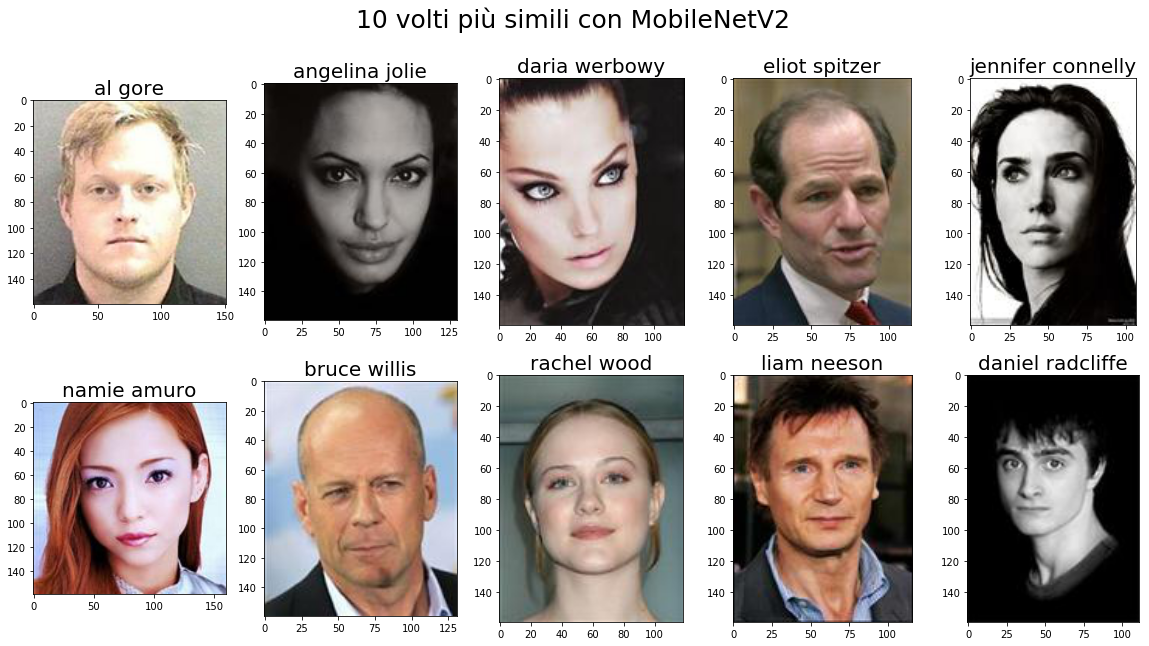

In [319]:
# Mostrare l'elemento più simile a quello specificato nella query
fig = plt.figure(figsize=(20,10))
for i in range(10):
    sub = fig.add_subplot(2,5,i+1)
    sub.title.set_text(paths[ind[0][i]].split('/')[8])
    sub.title.set_size(20)
    fig.suptitle('10 volti più simili con MobileNetV2',size=25)
    sub.imshow(kimage.load_img(paths[ind[0][i]]), interpolation='bilinear')

## Image Retrieval using VGG16

In [217]:
# Caricamento modello Inception ResNet
net2 = vgg16.VGG16(include_top=False, weights='imagenet', pooling='avg', input_shape=(224, 224, 3))

In [218]:
#features extraction
def neural_features2(img):
    x = kimage.img_to_array(img)
    x = vgg16.preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    f = net2.predict(x)
    return f.flatten()

In [333]:
#estrazione delle features dalla query
features2 = neural_features2(face)
print(features2.shape)
# Aggiunta dimensione per l'uso del KDTree
query_features = np.expand_dims(features2, axis=0)
print(query_features.shape)

(512,)
(1, 512)


In [221]:
t0 = time.time()
X_train2, paths2 = load_dataset(1,feature_extractor=neural_features2)
print("Caricamento e feature extraction in %0.3f secondi" % (time.time() - t0))

>loaded 1 examples for class: jessica biel
>loaded 1 examples for class: robert gates
>loaded 1 examples for class: justin timberlake
>loaded 1 examples for class: tim gunn
>loaded 1 examples for class: madhuri dixit
>loaded 1 examples for class: lara dutta
>loaded 1 examples for class: triple h
>loaded 1 examples for class: rodrigo santoro
>loaded 1 examples for class: dennis hopper
>loaded 1 examples for class: anna semenovich
>loaded 1 examples for class: freddie prinze
>loaded 1 examples for class: candice swanepoel
>loaded 1 examples for class: emily procter
>loaded 1 examples for class: prince william
>loaded 1 examples for class: julian mcmahon
>loaded 1 examples for class: demi moore
>loaded 1 examples for class: ringo starr
>loaded 1 examples for class: sharon stone
>loaded 1 examples for class: annalynne mccord
>loaded 1 examples for class: travis barker
>loaded 1 examples for class: thomas jane
>loaded 1 examples for class: michelle hunziker
>loaded 1 examples for class: dar

>loaded 1 examples for class: sam cooke
>loaded 1 examples for class: mike oldfield
>loaded 1 examples for class: lindsay lohan
>loaded 1 examples for class: leonard cohen
>loaded 1 examples for class: david j
>loaded 1 examples for class: barry manilow
>loaded 1 examples for class: deepika padukone
>loaded 1 examples for class: bridget moynahan
>loaded 1 examples for class: jacques chirac
>loaded 1 examples for class: eric bana
>loaded 1 examples for class: devon jones
>loaded 1 examples for class: bianca gascoigne
>loaded 1 examples for class: tzipi livni
>loaded 1 examples for class: gerard way
>loaded 1 examples for class: sigourney weaver
>loaded 1 examples for class: mitt romney
>loaded 1 examples for class: philip greenspun
>loaded 1 examples for class: aya ueto
>loaded 1 examples for class: ashley scott
>loaded 1 examples for class: paul simon
>loaded 1 examples for class: jay z
>loaded 1 examples for class: michael crichton
>loaded 1 examples for class: tim burton
>loaded 1 ex

>loaded 1 examples for class: kelly rowland
>loaded 1 examples for class: shilpa shetty
>loaded 1 examples for class: dionne warwick
>loaded 1 examples for class: javier bardem
>loaded 1 examples for class: maria sharapova
>loaded 1 examples for class: katharine hepburn
>loaded 1 examples for class: pharrell williams
>loaded 1 examples for class: marion cotillard
>loaded 1 examples for class: stanley kubrick
>loaded 1 examples for class: milo ventimiglia
>loaded 1 examples for class: ashley judd
>loaded 1 examples for class: shia labeouf
>loaded 1 examples for class: george soros
>loaded 1 examples for class: walt whitman
>loaded 1 examples for class: mia kirshner
>loaded 1 examples for class: maggie q
>loaded 1 examples for class: lee dong
>loaded 1 examples for class: marc jacobs
>loaded 1 examples for class: sean connery
>loaded 0 examples for class: urs hoelzle
>loaded 1 examples for class: steven seagal
>loaded 1 examples for class: katie holmes
>loaded 1 examples for class: jimmy

>loaded 1 examples for class: wayne rooney
>loaded 1 examples for class: amy acker
>loaded 1 examples for class: jacqueline bisset
>loaded 1 examples for class: nigella lawson
>loaded 1 examples for class: dayana mendoza
>loaded 1 examples for class: vivien leigh
>loaded 1 examples for class: hamid karzai
>loaded 1 examples for class: neve campbell
>loaded 1 examples for class: tracy chapman
>loaded 1 examples for class: jennifer hawkins
>loaded 1 examples for class: paul newman
>loaded 1 examples for class: brittany snow
>loaded 1 examples for class: faith hill
>loaded 1 examples for class: kelly carlson
>loaded 1 examples for class: cynthia mckinney
>loaded 1 examples for class: don bosco
>loaded 1 examples for class: channing tatum
>loaded 1 examples for class: eddie murphy
>loaded 1 examples for class: olivia newton
>loaded 1 examples for class: petra nemcova
>loaded 1 examples for class: ryan reynolds
>loaded 1 examples for class: howard dean
>loaded 1 examples for class: leslie b

>loaded 1 examples for class: salma hayek
>loaded 1 examples for class: alec baldwin
>loaded 1 examples for class: rudy giuliani
>loaded 1 examples for class: johnny depp
>loaded 1 examples for class: louis armstrong
>loaded 1 examples for class: marie claire
>loaded 1 examples for class: vanessa williams
>loaded 1 examples for class: ken loach
>loaded 1 examples for class: el presidente
>loaded 1 examples for class: neil young
>loaded 1 examples for class: agatha christie
>loaded 1 examples for class: olivia munn
>loaded 1 examples for class: lady sovereign
>loaded 1 examples for class: zinedine zidane
>loaded 1 examples for class: clint eastwood
>loaded 1 examples for class: emily dickinson
>loaded 1 examples for class: brett favre
>loaded 1 examples for class: matt dillon
>loaded 1 examples for class: kylie minogue
>loaded 1 examples for class: sean penn
>loaded 1 examples for class: patricia heaton
>loaded 1 examples for class: paul walker
>loaded 1 examples for class: tom hanks
>l

>loaded 1 examples for class: benjamin franklin
>loaded 1 examples for class: francis ford
>loaded 1 examples for class: tara reid
>loaded 1 examples for class: charles baudelaire
>loaded 1 examples for class: danica patrick
>loaded 1 examples for class: william shakespeare
>loaded 1 examples for class: kurt russell
>loaded 1 examples for class: stevie wonder
>loaded 1 examples for class: blaise pascal
>loaded 1 examples for class: adrian grenier
>loaded 1 examples for class: daddy yankee
>loaded 1 examples for class: jeff buckley
>loaded 1 examples for class: blake lively
>loaded 1 examples for class: grace jones
>loaded 1 examples for class: hu jintao
>loaded 1 examples for class: christopher columbus
>loaded 1 examples for class: manisha koirala
>loaded 1 examples for class: john abraham
>loaded 1 examples for class: jon stewart
>loaded 1 examples for class: jennifer morrison
>loaded 1 examples for class: emma roberts
>loaded 1 examples for class: tina turner
>loaded 1 examples for 

>loaded 1 examples for class: matthew perry
>loaded 1 examples for class: hugh laurie
>loaded 1 examples for class: prince harry
>loaded 1 examples for class: steve martin
>loaded 1 examples for class: poppy montgomery
>loaded 1 examples for class: lee young
>loaded 1 examples for class: ben harper
>loaded 1 examples for class: marilyn monroe
>loaded 1 examples for class: viggo mortensen
>loaded 1 examples for class: stacy ferguson
>loaded 1 examples for class: marlon brando
>loaded 1 examples for class: calvin klein
>loaded 1 examples for class: dustin hoffman
>loaded 1 examples for class: gerard butler
>loaded 1 examples for class: nicolas sarkozy
>loaded 1 examples for class: jennifer tilly
>loaded 1 examples for class: charisma carpenter
>loaded 1 examples for class: nell mcandrew
>loaded 1 examples for class: julianne moore
>loaded 1 examples for class: keanu reeves
>loaded 1 examples for class: humphrey bogart
>loaded 1 examples for class: michael bloomberg
>loaded 1 examples for

>loaded 1 examples for class: gregory peck
>loaded 1 examples for class: antonio banderas
>loaded 1 examples for class: garth brooks
>loaded 1 examples for class: leryn franco
>loaded 1 examples for class: aaron eckhart
>loaded 1 examples for class: bruce springsteen
>loaded 1 examples for class: shania twain
>loaded 1 examples for class: britney spears
>loaded 1 examples for class: krista allen
>loaded 1 examples for class: kevin spacey
>loaded 1 examples for class: natalie portman
>loaded 1 examples for class: isaac newton
>loaded 1 examples for class: tyra banks
>loaded 1 examples for class: george michael
>loaded 1 examples for class: robert burns
>loaded 1 examples for class: gabriel garcia
>loaded 1 examples for class: gerald ford
>loaded 1 examples for class: matthew mcconaughey
>loaded 1 examples for class: shayne ward
>loaded 1 examples for class: cece winans
>loaded 1 examples for class: mary kate
>loaded 1 examples for class: kelly ripa
>loaded 1 examples for class: nadia bj

>loaded 1 examples for class: drew fuller
>loaded 1 examples for class: minnie driver
>loaded 1 examples for class: david villa
>loaded 1 examples for class: aretha franklin
>loaded 1 examples for class: harumi nemoto
>loaded 1 examples for class: clay aiken
>loaded 1 examples for class: tom selleck
>loaded 1 examples for class: mahmoud ahmadinejad
>loaded 1 examples for class: nikki cox
>loaded 1 examples for class: tim russert
>loaded 1 examples for class: julianne hough
>loaded 1 examples for class: rachel hunter
>loaded 1 examples for class: karl lagerfeld
>loaded 1 examples for class: del piero
>loaded 1 examples for class: jane austen
>loaded 1 examples for class: julie andrews
>loaded 1 examples for class: ava gardner
>loaded 1 examples for class: alex rodriguez
>loaded 1 examples for class: cristiano ronaldo
>loaded 1 examples for class: jarah mariano
>loaded 1 examples for class: isla fisher
>loaded 1 examples for class: yo yo
>loaded 1 examples for class: rufus wainwright
>lo

In [334]:
#costruzione dell'albero di ricerca
tree2 = KDTree(X_train2)
#salvataggio dell'albero
joblib.dump(tree,'vgg16_tree.joblib')
# Ricerca Inception ResNet
dist2, ind2 = tree2.query(query_features, k=10, dualtree = True)

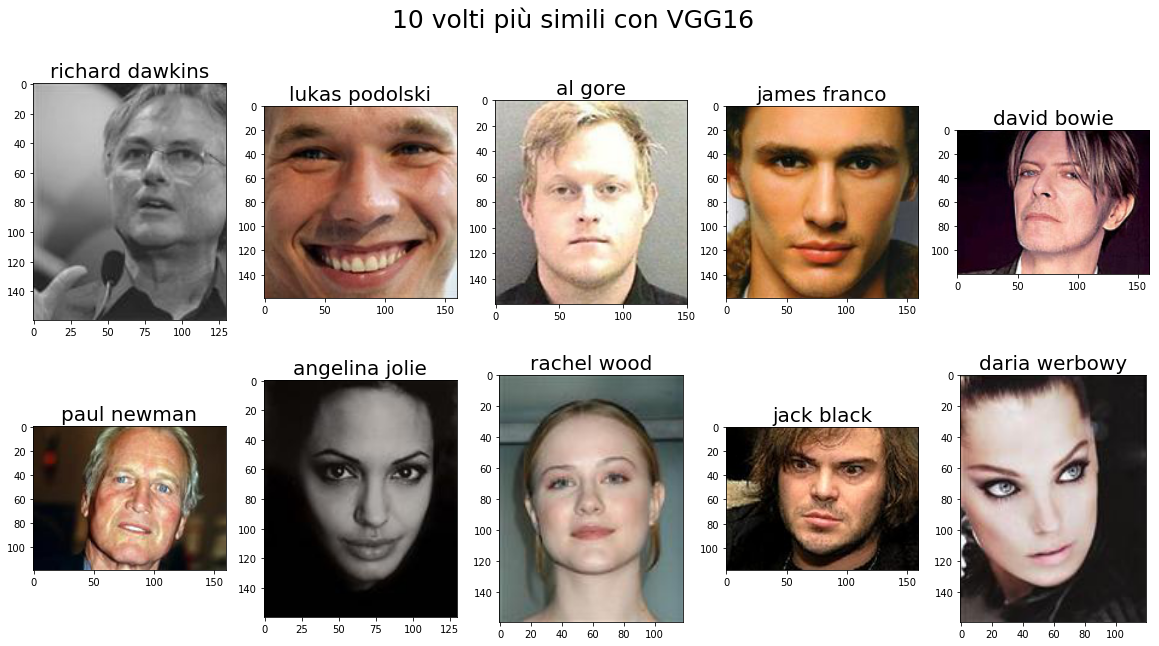

In [335]:
# Mostrare l'elemento più simile a quello specificato nella query
fig = plt.figure(figsize=(20,10))
for i in range(10):
    sub = fig.add_subplot(2,5,i+1)
    sub.title.set_text(paths2[ind2[0][i]].split('/')[8])
    sub.title.set_size(20)
    fig.suptitle('10 volti più simili con VGG16',size=25)
    sub.imshow(kimage.load_img(paths2[ind2[0][i]]), interpolation='bilinear')

## Image Retrieval using ResNet50

In [225]:
# Caricamento modello Densenet
net3 = ResNet50(include_top=False, weights='imagenet', pooling='avg', input_shape=(224, 224, 3))


94658560/94653016 [==============================] - 329s 3us/step


In [246]:
def neural_features3(img):
    x = kimage.img_to_array(img)
    x = resnet50.preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    f = net3.predict(x)
    return f.flatten()

In [336]:
#estrazione delle features dalla query
features3 = neural_features3(face)
print(features.shape)
# Aggiunta dimensione per l'uso del KDTree
query_features = np.expand_dims(features3, axis=0)
print(query_features.shape)

(1280,)
(1, 2048)


In [248]:
t0 = time.time()
X_train3, paths3 = load_dataset(1,feature_extractor=neural_features3)
print("Caricamento e feature extraction in %0.3f secondi" % (time.time() - t0))

>loaded 1 examples for class: jessica biel
>loaded 1 examples for class: robert gates
>loaded 1 examples for class: justin timberlake
>loaded 1 examples for class: tim gunn
>loaded 1 examples for class: madhuri dixit
>loaded 1 examples for class: lara dutta
>loaded 1 examples for class: triple h
>loaded 1 examples for class: rodrigo santoro
>loaded 1 examples for class: dennis hopper
>loaded 1 examples for class: anna semenovich
>loaded 1 examples for class: freddie prinze
>loaded 1 examples for class: candice swanepoel
>loaded 1 examples for class: emily procter
>loaded 1 examples for class: prince william
>loaded 1 examples for class: julian mcmahon
>loaded 1 examples for class: demi moore
>loaded 1 examples for class: ringo starr
>loaded 1 examples for class: sharon stone
>loaded 1 examples for class: annalynne mccord
>loaded 1 examples for class: travis barker
>loaded 1 examples for class: thomas jane
>loaded 1 examples for class: michelle hunziker
>loaded 1 examples for class: dar

>loaded 1 examples for class: sam cooke
>loaded 1 examples for class: mike oldfield
>loaded 1 examples for class: lindsay lohan
>loaded 1 examples for class: leonard cohen
>loaded 1 examples for class: david j
>loaded 1 examples for class: barry manilow
>loaded 1 examples for class: deepika padukone
>loaded 1 examples for class: bridget moynahan
>loaded 1 examples for class: jacques chirac
>loaded 1 examples for class: eric bana
>loaded 1 examples for class: devon jones
>loaded 1 examples for class: bianca gascoigne
>loaded 1 examples for class: tzipi livni
>loaded 1 examples for class: gerard way
>loaded 1 examples for class: sigourney weaver
>loaded 1 examples for class: mitt romney
>loaded 1 examples for class: philip greenspun
>loaded 1 examples for class: aya ueto
>loaded 1 examples for class: ashley scott
>loaded 1 examples for class: paul simon
>loaded 1 examples for class: jay z
>loaded 1 examples for class: michael crichton
>loaded 1 examples for class: tim burton
>loaded 1 ex

>loaded 1 examples for class: kelly rowland
>loaded 1 examples for class: shilpa shetty
>loaded 1 examples for class: dionne warwick
>loaded 1 examples for class: javier bardem
>loaded 1 examples for class: maria sharapova
>loaded 1 examples for class: katharine hepburn
>loaded 1 examples for class: pharrell williams
>loaded 1 examples for class: marion cotillard
>loaded 1 examples for class: stanley kubrick
>loaded 1 examples for class: milo ventimiglia
>loaded 1 examples for class: ashley judd
>loaded 1 examples for class: shia labeouf
>loaded 1 examples for class: george soros
>loaded 1 examples for class: walt whitman
>loaded 1 examples for class: mia kirshner
>loaded 1 examples for class: maggie q
>loaded 1 examples for class: lee dong
>loaded 1 examples for class: marc jacobs
>loaded 1 examples for class: sean connery
>loaded 0 examples for class: urs hoelzle
>loaded 1 examples for class: steven seagal
>loaded 1 examples for class: katie holmes
>loaded 1 examples for class: jimmy

>loaded 1 examples for class: wayne rooney
>loaded 1 examples for class: amy acker
>loaded 1 examples for class: jacqueline bisset
>loaded 1 examples for class: nigella lawson
>loaded 1 examples for class: dayana mendoza
>loaded 1 examples for class: vivien leigh
>loaded 1 examples for class: hamid karzai
>loaded 1 examples for class: neve campbell
>loaded 1 examples for class: tracy chapman
>loaded 1 examples for class: jennifer hawkins
>loaded 1 examples for class: paul newman
>loaded 1 examples for class: brittany snow
>loaded 1 examples for class: faith hill
>loaded 1 examples for class: kelly carlson
>loaded 1 examples for class: cynthia mckinney
>loaded 1 examples for class: don bosco
>loaded 1 examples for class: channing tatum
>loaded 1 examples for class: eddie murphy
>loaded 1 examples for class: olivia newton
>loaded 1 examples for class: petra nemcova
>loaded 1 examples for class: ryan reynolds
>loaded 1 examples for class: howard dean
>loaded 1 examples for class: leslie b

>loaded 1 examples for class: salma hayek
>loaded 1 examples for class: alec baldwin
>loaded 1 examples for class: rudy giuliani
>loaded 1 examples for class: johnny depp
>loaded 1 examples for class: louis armstrong
>loaded 1 examples for class: marie claire
>loaded 1 examples for class: vanessa williams
>loaded 1 examples for class: ken loach
>loaded 1 examples for class: el presidente
>loaded 1 examples for class: neil young
>loaded 1 examples for class: agatha christie
>loaded 1 examples for class: olivia munn
>loaded 1 examples for class: lady sovereign
>loaded 1 examples for class: zinedine zidane
>loaded 1 examples for class: clint eastwood
>loaded 1 examples for class: emily dickinson
>loaded 1 examples for class: brett favre
>loaded 1 examples for class: matt dillon
>loaded 1 examples for class: kylie minogue
>loaded 1 examples for class: sean penn
>loaded 1 examples for class: patricia heaton
>loaded 1 examples for class: paul walker
>loaded 1 examples for class: tom hanks
>l

>loaded 1 examples for class: benjamin franklin
>loaded 1 examples for class: francis ford
>loaded 1 examples for class: tara reid
>loaded 1 examples for class: charles baudelaire
>loaded 1 examples for class: danica patrick
>loaded 1 examples for class: william shakespeare
>loaded 1 examples for class: kurt russell
>loaded 1 examples for class: stevie wonder
>loaded 1 examples for class: blaise pascal
>loaded 1 examples for class: adrian grenier
>loaded 1 examples for class: daddy yankee
>loaded 1 examples for class: jeff buckley
>loaded 1 examples for class: blake lively
>loaded 1 examples for class: grace jones
>loaded 1 examples for class: hu jintao
>loaded 1 examples for class: christopher columbus
>loaded 1 examples for class: manisha koirala
>loaded 1 examples for class: john abraham
>loaded 1 examples for class: jon stewart
>loaded 1 examples for class: jennifer morrison
>loaded 1 examples for class: emma roberts
>loaded 1 examples for class: tina turner
>loaded 1 examples for 

>loaded 1 examples for class: matthew perry
>loaded 1 examples for class: hugh laurie
>loaded 1 examples for class: prince harry
>loaded 1 examples for class: steve martin
>loaded 1 examples for class: poppy montgomery
>loaded 1 examples for class: lee young
>loaded 1 examples for class: ben harper
>loaded 1 examples for class: marilyn monroe
>loaded 1 examples for class: viggo mortensen
>loaded 1 examples for class: stacy ferguson
>loaded 1 examples for class: marlon brando
>loaded 1 examples for class: calvin klein
>loaded 1 examples for class: dustin hoffman
>loaded 1 examples for class: gerard butler
>loaded 1 examples for class: nicolas sarkozy
>loaded 1 examples for class: jennifer tilly
>loaded 1 examples for class: charisma carpenter
>loaded 1 examples for class: nell mcandrew
>loaded 1 examples for class: julianne moore
>loaded 1 examples for class: keanu reeves
>loaded 1 examples for class: humphrey bogart
>loaded 1 examples for class: michael bloomberg
>loaded 1 examples for

>loaded 1 examples for class: gregory peck
>loaded 1 examples for class: antonio banderas
>loaded 1 examples for class: garth brooks
>loaded 1 examples for class: leryn franco
>loaded 1 examples for class: aaron eckhart
>loaded 1 examples for class: bruce springsteen
>loaded 1 examples for class: shania twain
>loaded 1 examples for class: britney spears
>loaded 1 examples for class: krista allen
>loaded 1 examples for class: kevin spacey
>loaded 1 examples for class: natalie portman
>loaded 1 examples for class: isaac newton
>loaded 1 examples for class: tyra banks
>loaded 1 examples for class: george michael
>loaded 1 examples for class: robert burns
>loaded 1 examples for class: gabriel garcia
>loaded 1 examples for class: gerald ford
>loaded 1 examples for class: matthew mcconaughey
>loaded 1 examples for class: shayne ward
>loaded 1 examples for class: cece winans
>loaded 1 examples for class: mary kate
>loaded 1 examples for class: kelly ripa
>loaded 1 examples for class: nadia bj

>loaded 1 examples for class: drew fuller
>loaded 1 examples for class: minnie driver
>loaded 1 examples for class: david villa
>loaded 1 examples for class: aretha franklin
>loaded 1 examples for class: harumi nemoto
>loaded 1 examples for class: clay aiken
>loaded 1 examples for class: tom selleck
>loaded 1 examples for class: mahmoud ahmadinejad
>loaded 1 examples for class: nikki cox
>loaded 1 examples for class: tim russert
>loaded 1 examples for class: julianne hough
>loaded 1 examples for class: rachel hunter
>loaded 1 examples for class: karl lagerfeld
>loaded 1 examples for class: del piero
>loaded 1 examples for class: jane austen
>loaded 1 examples for class: julie andrews
>loaded 1 examples for class: ava gardner
>loaded 1 examples for class: alex rodriguez
>loaded 1 examples for class: cristiano ronaldo
>loaded 1 examples for class: jarah mariano
>loaded 1 examples for class: isla fisher
>loaded 1 examples for class: yo yo
>loaded 1 examples for class: rufus wainwright
>lo

In [337]:
#costruzione dell'albero di ricerca
tree3 = KDTree(X_train3)
#salvataggio dell'albero
joblib.dump(tree,'ResNet50_tree.joblib')
# Ricerca Inception ResNet
dist3, ind3 = tree3.query(query_features, k=10, dualtree = True)

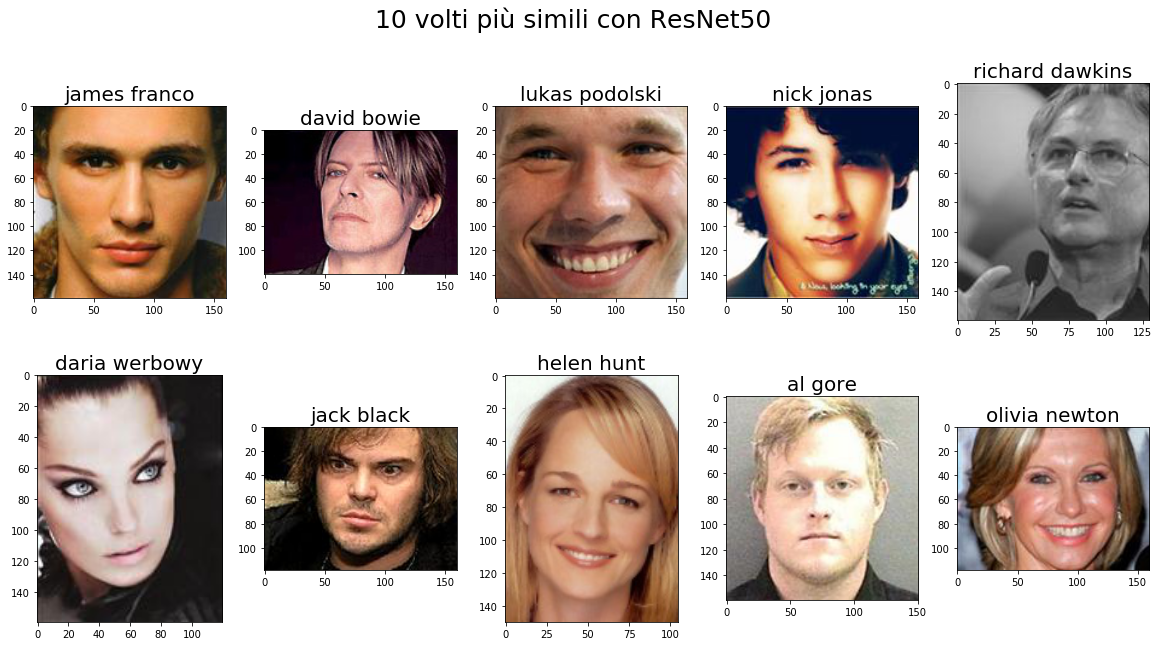

In [338]:
# Mostrare l'elemento più simile a quello specificato nella query
fig = plt.figure(figsize=(20,10))
for i in range(10):
    sub = fig.add_subplot(2,5,i+1)
    sub.title.set_text(paths3[ind3[0][i]].split('/')[8])
    sub.title.set_size(20)
    fig.suptitle('10 volti più simili con ResNet50',size=25)
    sub.imshow(kimage.load_img(paths3[ind3[0][i]]), interpolation='bilinear')

In [251]:
#nota versione per salvataggio
import sklearn
print(sklearn.__version__)

0.21.3


## Image Retrieval using VGGFace and Vgg16

In [252]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [262]:
model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [254]:
def VVGface_features(img):
    img = img.astype('float32')
    x = preprocess_input(img, version=2)
    x = np.expand_dims(x, axis=0)
    f = model.predict(x)
    return f.flatten()

In [342]:
#estrazione delle features dalla query
features4 = VVGface_features(face)
print(features4.shape)
# Aggiunta dimensione per l'uso del KDTree
query_features = np.expand_dims(features4, axis=0)
print(query_features.shape)

(512,)
(1, 512)


In [255]:
t0 = time.time()
X_train4, paths4 = load_dataset(1,feature_extractor=VVGface_features)
print("Caricamento e feature extraction in %0.3f secondi" % (time.time() - t0))

>loaded 1 examples for class: jessica biel
>loaded 1 examples for class: robert gates
>loaded 1 examples for class: justin timberlake
>loaded 1 examples for class: tim gunn
>loaded 1 examples for class: madhuri dixit
>loaded 1 examples for class: lara dutta
>loaded 1 examples for class: triple h
>loaded 1 examples for class: rodrigo santoro
>loaded 1 examples for class: dennis hopper
>loaded 1 examples for class: anna semenovich
>loaded 1 examples for class: freddie prinze
>loaded 1 examples for class: candice swanepoel
>loaded 1 examples for class: emily procter
>loaded 1 examples for class: prince william
>loaded 1 examples for class: julian mcmahon
>loaded 1 examples for class: demi moore
>loaded 1 examples for class: ringo starr
>loaded 1 examples for class: sharon stone
>loaded 1 examples for class: annalynne mccord
>loaded 1 examples for class: travis barker
>loaded 1 examples for class: thomas jane
>loaded 1 examples for class: michelle hunziker
>loaded 1 examples for class: dar

>loaded 1 examples for class: sam cooke
>loaded 1 examples for class: mike oldfield
>loaded 1 examples for class: lindsay lohan
>loaded 1 examples for class: leonard cohen
>loaded 1 examples for class: david j
>loaded 1 examples for class: barry manilow
>loaded 1 examples for class: deepika padukone
>loaded 1 examples for class: bridget moynahan
>loaded 1 examples for class: jacques chirac
>loaded 1 examples for class: eric bana
>loaded 1 examples for class: devon jones
>loaded 1 examples for class: bianca gascoigne
>loaded 1 examples for class: tzipi livni
>loaded 1 examples for class: gerard way
>loaded 1 examples for class: sigourney weaver
>loaded 1 examples for class: mitt romney
>loaded 1 examples for class: philip greenspun
>loaded 1 examples for class: aya ueto
>loaded 1 examples for class: ashley scott
>loaded 1 examples for class: paul simon
>loaded 1 examples for class: jay z
>loaded 1 examples for class: michael crichton
>loaded 1 examples for class: tim burton
>loaded 1 ex

>loaded 1 examples for class: kelly rowland
>loaded 1 examples for class: shilpa shetty
>loaded 1 examples for class: dionne warwick
>loaded 1 examples for class: javier bardem
>loaded 1 examples for class: maria sharapova
>loaded 1 examples for class: katharine hepburn
>loaded 1 examples for class: pharrell williams
>loaded 1 examples for class: marion cotillard
>loaded 1 examples for class: stanley kubrick
>loaded 1 examples for class: milo ventimiglia
>loaded 1 examples for class: ashley judd
>loaded 1 examples for class: shia labeouf
>loaded 1 examples for class: george soros
>loaded 1 examples for class: walt whitman
>loaded 1 examples for class: mia kirshner
>loaded 1 examples for class: maggie q
>loaded 1 examples for class: lee dong
>loaded 1 examples for class: marc jacobs
>loaded 1 examples for class: sean connery
>loaded 0 examples for class: urs hoelzle
>loaded 1 examples for class: steven seagal
>loaded 1 examples for class: katie holmes
>loaded 1 examples for class: jimmy

>loaded 1 examples for class: wayne rooney
>loaded 1 examples for class: amy acker
>loaded 1 examples for class: jacqueline bisset
>loaded 1 examples for class: nigella lawson
>loaded 1 examples for class: dayana mendoza
>loaded 1 examples for class: vivien leigh
>loaded 1 examples for class: hamid karzai
>loaded 1 examples for class: neve campbell
>loaded 1 examples for class: tracy chapman
>loaded 1 examples for class: jennifer hawkins
>loaded 1 examples for class: paul newman
>loaded 1 examples for class: brittany snow
>loaded 1 examples for class: faith hill
>loaded 1 examples for class: kelly carlson
>loaded 1 examples for class: cynthia mckinney
>loaded 1 examples for class: don bosco
>loaded 1 examples for class: channing tatum
>loaded 1 examples for class: eddie murphy
>loaded 1 examples for class: olivia newton
>loaded 1 examples for class: petra nemcova
>loaded 1 examples for class: ryan reynolds
>loaded 1 examples for class: howard dean
>loaded 1 examples for class: leslie b

>loaded 1 examples for class: salma hayek
>loaded 1 examples for class: alec baldwin
>loaded 1 examples for class: rudy giuliani
>loaded 1 examples for class: johnny depp
>loaded 1 examples for class: louis armstrong
>loaded 1 examples for class: marie claire
>loaded 1 examples for class: vanessa williams
>loaded 1 examples for class: ken loach
>loaded 1 examples for class: el presidente
>loaded 1 examples for class: neil young
>loaded 1 examples for class: agatha christie
>loaded 1 examples for class: olivia munn
>loaded 1 examples for class: lady sovereign
>loaded 1 examples for class: zinedine zidane
>loaded 1 examples for class: clint eastwood
>loaded 1 examples for class: emily dickinson
>loaded 1 examples for class: brett favre
>loaded 1 examples for class: matt dillon
>loaded 1 examples for class: kylie minogue
>loaded 1 examples for class: sean penn
>loaded 1 examples for class: patricia heaton
>loaded 1 examples for class: paul walker
>loaded 1 examples for class: tom hanks
>l

>loaded 1 examples for class: benjamin franklin
>loaded 1 examples for class: francis ford
>loaded 1 examples for class: tara reid
>loaded 1 examples for class: charles baudelaire
>loaded 1 examples for class: danica patrick
>loaded 1 examples for class: william shakespeare
>loaded 1 examples for class: kurt russell
>loaded 1 examples for class: stevie wonder
>loaded 1 examples for class: blaise pascal
>loaded 1 examples for class: adrian grenier
>loaded 1 examples for class: daddy yankee
>loaded 1 examples for class: jeff buckley
>loaded 1 examples for class: blake lively
>loaded 1 examples for class: grace jones
>loaded 1 examples for class: hu jintao
>loaded 1 examples for class: christopher columbus
>loaded 1 examples for class: manisha koirala
>loaded 1 examples for class: john abraham
>loaded 1 examples for class: jon stewart
>loaded 1 examples for class: jennifer morrison
>loaded 1 examples for class: emma roberts
>loaded 1 examples for class: tina turner
>loaded 1 examples for 

>loaded 1 examples for class: matthew perry
>loaded 1 examples for class: hugh laurie
>loaded 1 examples for class: prince harry
>loaded 1 examples for class: steve martin
>loaded 1 examples for class: poppy montgomery
>loaded 1 examples for class: lee young
>loaded 1 examples for class: ben harper
>loaded 1 examples for class: marilyn monroe
>loaded 1 examples for class: viggo mortensen
>loaded 1 examples for class: stacy ferguson
>loaded 1 examples for class: marlon brando
>loaded 1 examples for class: calvin klein
>loaded 1 examples for class: dustin hoffman
>loaded 1 examples for class: gerard butler
>loaded 1 examples for class: nicolas sarkozy
>loaded 1 examples for class: jennifer tilly
>loaded 1 examples for class: charisma carpenter
>loaded 1 examples for class: nell mcandrew
>loaded 1 examples for class: julianne moore
>loaded 1 examples for class: keanu reeves
>loaded 1 examples for class: humphrey bogart
>loaded 1 examples for class: michael bloomberg
>loaded 1 examples for

>loaded 1 examples for class: gregory peck
>loaded 1 examples for class: antonio banderas
>loaded 1 examples for class: garth brooks
>loaded 1 examples for class: leryn franco
>loaded 1 examples for class: aaron eckhart
>loaded 1 examples for class: bruce springsteen
>loaded 1 examples for class: shania twain
>loaded 1 examples for class: britney spears
>loaded 1 examples for class: krista allen
>loaded 1 examples for class: kevin spacey
>loaded 1 examples for class: natalie portman
>loaded 1 examples for class: isaac newton
>loaded 1 examples for class: tyra banks
>loaded 1 examples for class: george michael
>loaded 1 examples for class: robert burns
>loaded 1 examples for class: gabriel garcia
>loaded 1 examples for class: gerald ford
>loaded 1 examples for class: matthew mcconaughey
>loaded 1 examples for class: shayne ward
>loaded 1 examples for class: cece winans
>loaded 1 examples for class: mary kate
>loaded 1 examples for class: kelly ripa
>loaded 1 examples for class: nadia bj

>loaded 1 examples for class: drew fuller
>loaded 1 examples for class: minnie driver
>loaded 1 examples for class: david villa
>loaded 1 examples for class: aretha franklin
>loaded 1 examples for class: harumi nemoto
>loaded 1 examples for class: clay aiken
>loaded 1 examples for class: tom selleck
>loaded 1 examples for class: mahmoud ahmadinejad
>loaded 1 examples for class: nikki cox
>loaded 1 examples for class: tim russert
>loaded 1 examples for class: julianne hough
>loaded 1 examples for class: rachel hunter
>loaded 1 examples for class: karl lagerfeld
>loaded 1 examples for class: del piero
>loaded 1 examples for class: jane austen
>loaded 1 examples for class: julie andrews
>loaded 1 examples for class: ava gardner
>loaded 1 examples for class: alex rodriguez
>loaded 1 examples for class: cristiano ronaldo
>loaded 1 examples for class: jarah mariano
>loaded 1 examples for class: isla fisher
>loaded 1 examples for class: yo yo
>loaded 1 examples for class: rufus wainwright
>lo

In [343]:
#costruzione dell'albero di ricerca
tree4 = KDTree(X_train4)
#salvataggio dell'albero
joblib.dump(tree4,'Vggface16_tree.joblib')
# Ricerca Inception ResNet
dist4, ind4 = tree4.query(query_features, k=10, dualtree = True)

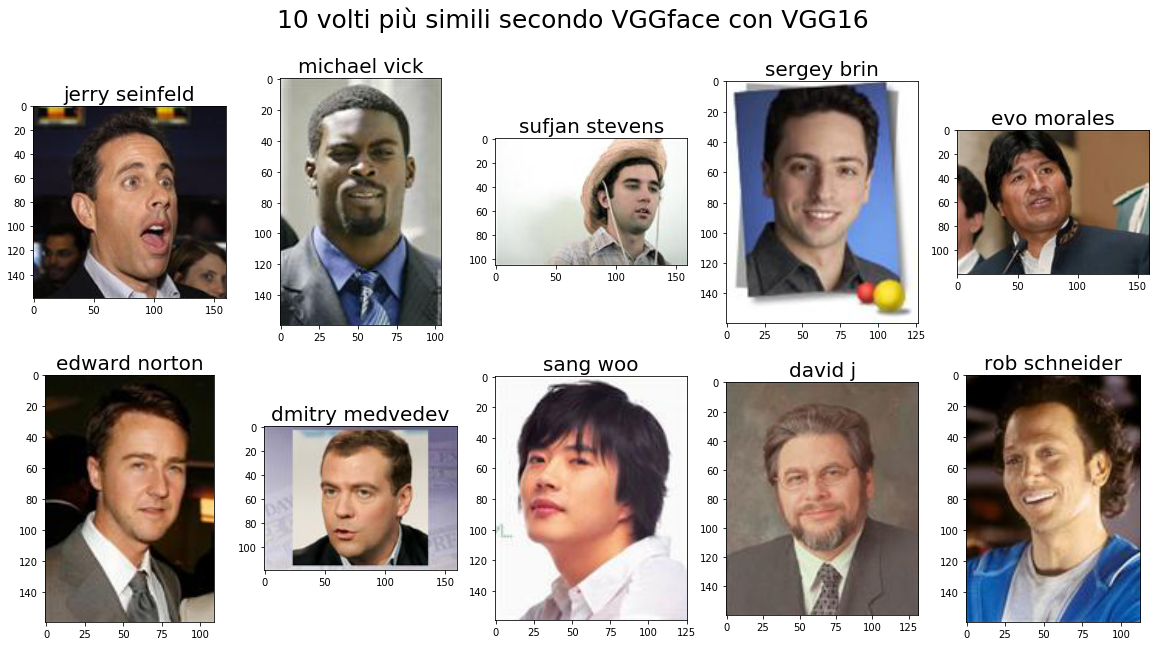

In [344]:
# Mostrare l'elemento più simile a quello specificato nella query
fig = plt.figure(figsize=(20,10))
for i in range(10):
    sub = fig.add_subplot(2,5,i+1)
    sub.title.set_text(paths4[ind4[0][i]].split('/')[8])
    sub.title.set_size(20)
    fig.suptitle('10 volti più simili secondo VGGface con VGG16',size=25)
    sub.imshow(kimage.load_img(paths4[ind4[0][i]]), interpolation='bilinear')

## Image Retrieval using VGGFace and ResNet50

In [264]:
model2 = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [265]:
def VVGface_features2(img):
    img = img.astype('float32')
    x = preprocess_input(img, version=2)
    x = np.expand_dims(x, axis=0)
    f = model2.predict(x)
    return f.flatten()

In [347]:
#estrazione delle features dalla query
features5 = VVGface_features2(face)
print(features5.shape)
# Aggiunta dimensione per l'uso del KDTree
query_features = np.expand_dims(features5, axis=0)
print(query_features.shape)

(2048,)
(1, 2048)


In [267]:
t0 = time.time()
X_train5, paths5 = load_dataset(1,feature_extractor=VVGface_features2)
print("Caricamento e feature extraction in %0.3f secondi" % (time.time() - t0))

>loaded 1 examples for class: jessica biel
>loaded 1 examples for class: robert gates
>loaded 1 examples for class: justin timberlake
>loaded 1 examples for class: tim gunn
>loaded 1 examples for class: madhuri dixit
>loaded 1 examples for class: lara dutta
>loaded 1 examples for class: triple h
>loaded 1 examples for class: rodrigo santoro
>loaded 1 examples for class: dennis hopper
>loaded 1 examples for class: anna semenovich
>loaded 1 examples for class: freddie prinze
>loaded 1 examples for class: candice swanepoel
>loaded 1 examples for class: emily procter
>loaded 1 examples for class: prince william
>loaded 1 examples for class: julian mcmahon
>loaded 1 examples for class: demi moore
>loaded 1 examples for class: ringo starr
>loaded 1 examples for class: sharon stone
>loaded 1 examples for class: annalynne mccord
>loaded 1 examples for class: travis barker
>loaded 1 examples for class: thomas jane
>loaded 1 examples for class: michelle hunziker
>loaded 1 examples for class: dar

>loaded 1 examples for class: sam cooke
>loaded 1 examples for class: mike oldfield
>loaded 1 examples for class: lindsay lohan
>loaded 1 examples for class: leonard cohen
>loaded 1 examples for class: david j
>loaded 1 examples for class: barry manilow
>loaded 1 examples for class: deepika padukone
>loaded 1 examples for class: bridget moynahan
>loaded 1 examples for class: jacques chirac
>loaded 1 examples for class: eric bana
>loaded 1 examples for class: devon jones
>loaded 1 examples for class: bianca gascoigne
>loaded 1 examples for class: tzipi livni
>loaded 1 examples for class: gerard way
>loaded 1 examples for class: sigourney weaver
>loaded 1 examples for class: mitt romney
>loaded 1 examples for class: philip greenspun
>loaded 1 examples for class: aya ueto
>loaded 1 examples for class: ashley scott
>loaded 1 examples for class: paul simon
>loaded 1 examples for class: jay z
>loaded 1 examples for class: michael crichton
>loaded 1 examples for class: tim burton
>loaded 1 ex

>loaded 1 examples for class: kelly rowland
>loaded 1 examples for class: shilpa shetty
>loaded 1 examples for class: dionne warwick
>loaded 1 examples for class: javier bardem
>loaded 1 examples for class: maria sharapova
>loaded 1 examples for class: katharine hepburn
>loaded 1 examples for class: pharrell williams
>loaded 1 examples for class: marion cotillard
>loaded 1 examples for class: stanley kubrick
>loaded 1 examples for class: milo ventimiglia
>loaded 1 examples for class: ashley judd
>loaded 1 examples for class: shia labeouf
>loaded 1 examples for class: george soros
>loaded 1 examples for class: walt whitman
>loaded 1 examples for class: mia kirshner
>loaded 1 examples for class: maggie q
>loaded 1 examples for class: lee dong
>loaded 1 examples for class: marc jacobs
>loaded 1 examples for class: sean connery
>loaded 0 examples for class: urs hoelzle
>loaded 1 examples for class: steven seagal
>loaded 1 examples for class: katie holmes
>loaded 1 examples for class: jimmy

>loaded 1 examples for class: wayne rooney
>loaded 1 examples for class: amy acker
>loaded 1 examples for class: jacqueline bisset
>loaded 1 examples for class: nigella lawson
>loaded 1 examples for class: dayana mendoza
>loaded 1 examples for class: vivien leigh
>loaded 1 examples for class: hamid karzai
>loaded 1 examples for class: neve campbell
>loaded 1 examples for class: tracy chapman
>loaded 1 examples for class: jennifer hawkins
>loaded 1 examples for class: paul newman
>loaded 1 examples for class: brittany snow
>loaded 1 examples for class: faith hill
>loaded 1 examples for class: kelly carlson
>loaded 1 examples for class: cynthia mckinney
>loaded 1 examples for class: don bosco
>loaded 1 examples for class: channing tatum
>loaded 1 examples for class: eddie murphy
>loaded 1 examples for class: olivia newton
>loaded 1 examples for class: petra nemcova
>loaded 1 examples for class: ryan reynolds
>loaded 1 examples for class: howard dean
>loaded 1 examples for class: leslie b

>loaded 1 examples for class: salma hayek
>loaded 1 examples for class: alec baldwin
>loaded 1 examples for class: rudy giuliani
>loaded 1 examples for class: johnny depp
>loaded 1 examples for class: louis armstrong
>loaded 1 examples for class: marie claire
>loaded 1 examples for class: vanessa williams
>loaded 1 examples for class: ken loach
>loaded 1 examples for class: el presidente
>loaded 1 examples for class: neil young
>loaded 1 examples for class: agatha christie
>loaded 1 examples for class: olivia munn
>loaded 1 examples for class: lady sovereign
>loaded 1 examples for class: zinedine zidane
>loaded 1 examples for class: clint eastwood
>loaded 1 examples for class: emily dickinson
>loaded 1 examples for class: brett favre
>loaded 1 examples for class: matt dillon
>loaded 1 examples for class: kylie minogue
>loaded 1 examples for class: sean penn
>loaded 1 examples for class: patricia heaton
>loaded 1 examples for class: paul walker
>loaded 1 examples for class: tom hanks
>l

>loaded 1 examples for class: benjamin franklin
>loaded 1 examples for class: francis ford
>loaded 1 examples for class: tara reid
>loaded 1 examples for class: charles baudelaire
>loaded 1 examples for class: danica patrick
>loaded 1 examples for class: william shakespeare
>loaded 1 examples for class: kurt russell
>loaded 1 examples for class: stevie wonder
>loaded 1 examples for class: blaise pascal
>loaded 1 examples for class: adrian grenier
>loaded 1 examples for class: daddy yankee
>loaded 1 examples for class: jeff buckley
>loaded 1 examples for class: blake lively
>loaded 1 examples for class: grace jones
>loaded 1 examples for class: hu jintao
>loaded 1 examples for class: christopher columbus
>loaded 1 examples for class: manisha koirala
>loaded 1 examples for class: john abraham
>loaded 1 examples for class: jon stewart
>loaded 1 examples for class: jennifer morrison
>loaded 1 examples for class: emma roberts
>loaded 1 examples for class: tina turner
>loaded 1 examples for 

>loaded 1 examples for class: matthew perry
>loaded 1 examples for class: hugh laurie
>loaded 1 examples for class: prince harry
>loaded 1 examples for class: steve martin
>loaded 1 examples for class: poppy montgomery
>loaded 1 examples for class: lee young
>loaded 1 examples for class: ben harper
>loaded 1 examples for class: marilyn monroe
>loaded 1 examples for class: viggo mortensen
>loaded 1 examples for class: stacy ferguson
>loaded 1 examples for class: marlon brando
>loaded 1 examples for class: calvin klein
>loaded 1 examples for class: dustin hoffman
>loaded 1 examples for class: gerard butler
>loaded 1 examples for class: nicolas sarkozy
>loaded 1 examples for class: jennifer tilly
>loaded 1 examples for class: charisma carpenter
>loaded 1 examples for class: nell mcandrew
>loaded 1 examples for class: julianne moore
>loaded 1 examples for class: keanu reeves
>loaded 1 examples for class: humphrey bogart
>loaded 1 examples for class: michael bloomberg
>loaded 1 examples for

>loaded 1 examples for class: gregory peck
>loaded 1 examples for class: antonio banderas
>loaded 1 examples for class: garth brooks
>loaded 1 examples for class: leryn franco
>loaded 1 examples for class: aaron eckhart
>loaded 1 examples for class: bruce springsteen
>loaded 1 examples for class: shania twain
>loaded 1 examples for class: britney spears
>loaded 1 examples for class: krista allen
>loaded 1 examples for class: kevin spacey
>loaded 1 examples for class: natalie portman
>loaded 1 examples for class: isaac newton
>loaded 1 examples for class: tyra banks
>loaded 1 examples for class: george michael
>loaded 1 examples for class: robert burns
>loaded 1 examples for class: gabriel garcia
>loaded 1 examples for class: gerald ford
>loaded 1 examples for class: matthew mcconaughey
>loaded 1 examples for class: shayne ward
>loaded 1 examples for class: cece winans
>loaded 1 examples for class: mary kate
>loaded 1 examples for class: kelly ripa
>loaded 1 examples for class: nadia bj

>loaded 1 examples for class: drew fuller
>loaded 1 examples for class: minnie driver
>loaded 1 examples for class: david villa
>loaded 1 examples for class: aretha franklin
>loaded 1 examples for class: harumi nemoto
>loaded 1 examples for class: clay aiken
>loaded 1 examples for class: tom selleck
>loaded 1 examples for class: mahmoud ahmadinejad
>loaded 1 examples for class: nikki cox
>loaded 1 examples for class: tim russert
>loaded 1 examples for class: julianne hough
>loaded 1 examples for class: rachel hunter
>loaded 1 examples for class: karl lagerfeld
>loaded 1 examples for class: del piero
>loaded 1 examples for class: jane austen
>loaded 1 examples for class: julie andrews
>loaded 1 examples for class: ava gardner
>loaded 1 examples for class: alex rodriguez
>loaded 1 examples for class: cristiano ronaldo
>loaded 1 examples for class: jarah mariano
>loaded 1 examples for class: isla fisher
>loaded 1 examples for class: yo yo
>loaded 1 examples for class: rufus wainwright
>lo

In [348]:
#costruzione dell'albero di ricerca
tree5 = KDTree(X_train5)
#salvataggio dell'albero
joblib.dump(tree5,'Vggface50_tree.joblib')
# Ricerca Inception ResNet
dist5, ind5 = tree5.query(query_features, k=10, dualtree = True)

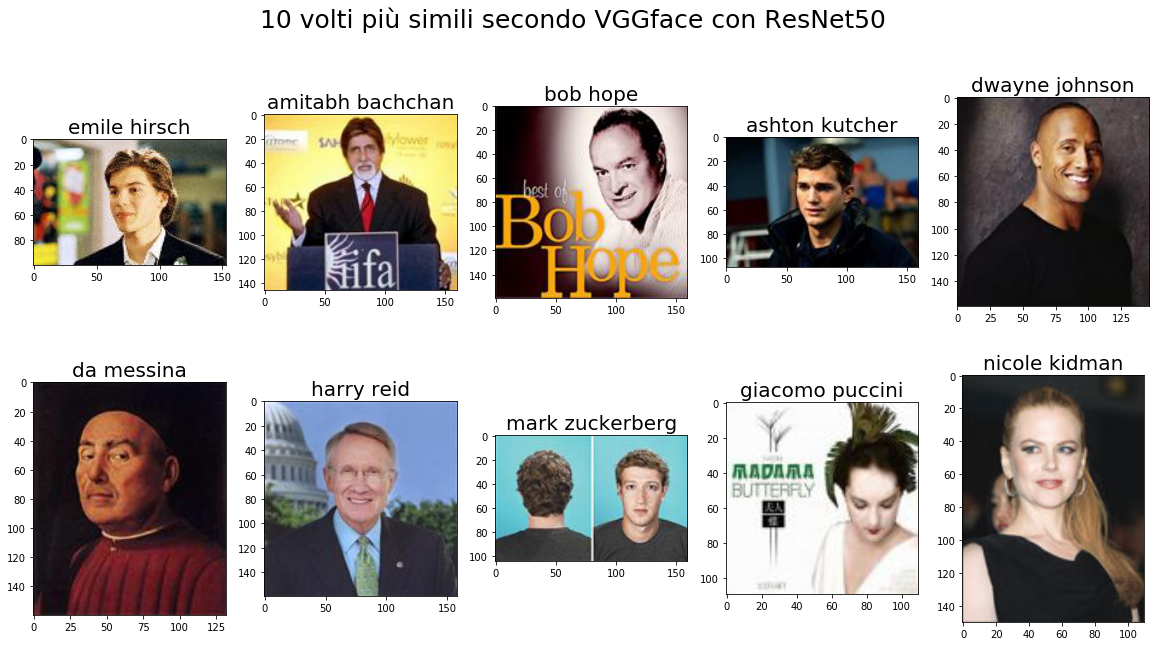

In [349]:
# Mostrare l'elemento più simile a quello specificato nella query
fig = plt.figure(figsize=(20,10))
for i in range(10):
    sub = fig.add_subplot(2,5,i+1)
    sub.title.set_text(paths5[ind5[0][i]].split('/')[8])
    sub.title.set_size(20)
    fig.suptitle('10 volti più simili secondo VGGface con ResNet50',size=25)
    sub.imshow(kimage.load_img(paths5[ind5[0][i]]), interpolation='bilinear')